# Exercise 5.1
*Simulate real valued data from an iid model and evaluate the performance 
of the jackknife estimate of standard error of the α-sample quantile. Come up yourself wit 
an appropriate idea for how to do this in an informative way and provide some visualizati n
of your resul*ts.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def jackknife_resampling(data):
    n = len(data)
    resamples = np.zeros((n, n-1))
    for i in range(n):
        resamples[i] = np.delete(data, i)
    return resamples

def task1(sample_size, alpha):
    # Simulating Data
    np.random.seed(42)
    #sample_size = 1000
    data = np.random.normal(loc=0, scale=1, size=sample_size)
    
    # Computing Quantile Estimates
    resamples = jackknife_resampling(data)
    jackknife_quantiles = np.percentile(resamples, alpha * 100, axis=1)
    jackknife_std_error = np.sqrt(np.sum((jackknife_quantiles - np.mean(jackknife_quantiles, axis=0))**2, axis=0) * sample_size / (sample_size - 1))
    return jackknife_std_error

In [2]:
from collections import defaultdict 
sizes = [i*100 for i in range(1,11)]
alphas = [0.05, 0.1, 0.25, 0.5]
averages = defaultdict(list)
for a in alphas:
    stds = defaultdict(list)
    for i in range(1000):
        for s in sizes:
            stds[str(s)].append(task1(s, a))
    for key, value in stds.items():
        averages[str(a)].append(sum(value) / len(value))

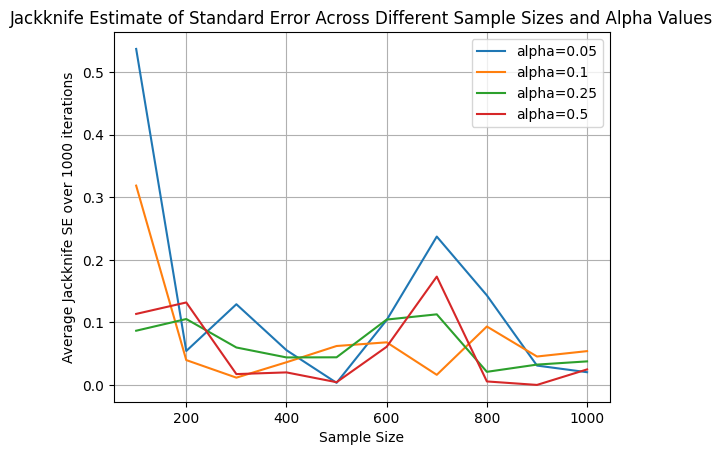

In [3]:
plt.plot(sizes, averages['0.05'], label="alpha=0.05")
plt.plot(sizes, averages['0.1'], label="alpha=0.1")
plt.plot(sizes, averages['0.25'], label="alpha=0.25")
plt.plot(sizes, averages['0.5'], label="alpha=0.5")
plt.title('Jackknife Estimate of Standard Error Across Different Sample Sizes and Alpha Values')
plt.xlabel('Sample Size')
plt.ylabel('Average Jackknife SE over 1000 iterations')
plt.legend()
plt.grid()

# Exercise 5.2

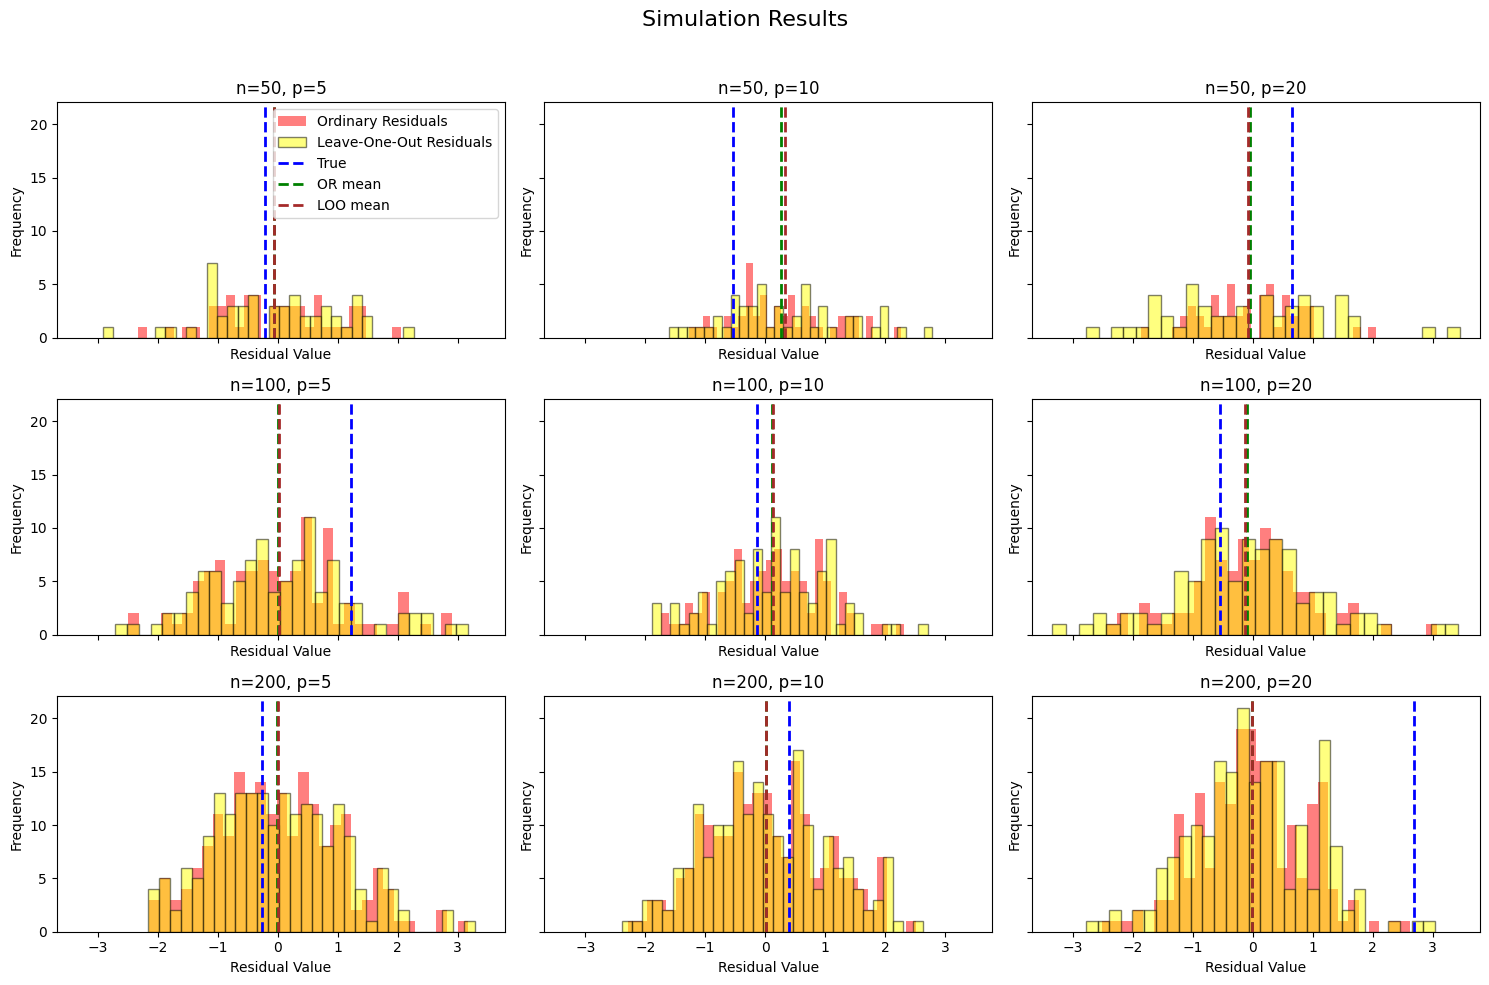

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Function to simulate data and calculate prediction error
def simulate_linear_model(n, p, sigma):
    # Simulate data
    X = np.random.normal(0, 1, size=(n, p)) #design matrix
    beta = np.random.normal(0, 1, size=p) #unknown parameter
    u = np.random.normal(0, sigma, size=n) 
    Y = np.dot(X, beta) + u

    # OLS estimate
    X_transpose_X_inv = np.linalg.inv(np.dot(X.T, X))
    beta_hat = np.dot(X_transpose_X_inv, np.dot(X.T, Y))

    # Prediction for Y0
    X0 = np.random.normal(0, 1, size=p)
    Y0_hat = np.dot(beta_hat, X0) + np.random.normal(0, sigma)
    true_pred_error = Y0_hat - X0 @ beta_hat

    # Ordinary residuals
    residuals_ordinary = Y - np.dot(X, beta_hat)

    # Leave-one-out residuals
    residuals_loo = np.zeros(n)
    for i in range(n):
        X_i = np.delete(X, i, axis=0)
        Y_i = np.delete(Y, i)
        beta_hat_i = np.dot(np.linalg.inv(np.dot(X_i.T, X_i)), np.dot(X_i.T, Y_i))
        residuals_loo[i] = Y[i] - np.dot(X[i], beta_hat_i)

    return true_pred_error, residuals_ordinary, residuals_loo

# Simulation parameters
np.random.seed(42)
n_values = [50, 100, 200]
p_values = [5, 10, 20]
sigma = 1.0

# Visualization
fig, axes = plt.subplots(len(n_values), len(p_values), figsize=(15, 10), sharex=True, sharey=True)
fig.suptitle('Simulation Results', fontsize=16)

for i, n in enumerate(n_values):
    for j, p in enumerate(p_values):
        
        true_pred_error, residuals_ordinary, residuals_loo = simulate_linear_model(n, p, sigma)
        
        # Calculate the mean for ordinary residuals
        mean_ordinary_residuals = np.mean(residuals_ordinary)
        
        # Calculate the mean for LOO residuals
        mean_loo_residuals = np.mean(residuals_loo)

        # Plot histograms
        axes[i, j].hist(residuals_ordinary, bins=30, alpha=0.5, color='red', label='Ordinary Residuals')
        axes[i, j].hist(residuals_loo, bins=30, alpha=0.5, color='yellow', edgecolor="black", label='Leave-One-Out Residuals')
        axes[i, j].axvline(true_pred_error, color='blue', linestyle='dashed', linewidth=2, label='True')
        axes[i, j].axvline(mean_ordinary_residuals, color='green', linestyle='dashed', linewidth=2, label='OR mean')
        axes[i, j].axvline(mean_loo_residuals, color='brown', linestyle='dashed', linewidth=2, label='LOO mean')
        axes[i, j].set_title(f'n={n}, p={p}')
        
axes[0, 0].legend()
for ax in axes.flat:
    ax.set(xlabel='Residual Value', ylabel='Frequency')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Exercise 5.3

#### Subtask 1
*Reproduce the plot from the lecture with the four different regression lines.*

In [23]:
import pandas as pd

df = pd.read_csv('./simpson.csv', sep=';')
print(df.head())

       score      time subject
1  82.157217  3.259355     art
2  79.984637  1.373325     art
3  78.465981  2.419104     art
4  82.858729  3.405667     art
5  82.311748  3.806870     art


In [24]:
# Dividing the data frames into separate ones according to the subject
english = df[df['subject'] == 'english']
math = df[df['subject'] == 'math']
science = df[df['subject'] == 'science']
art = df[df['subject'] == 'art']

In [25]:
# Creating the independant and dependant variable vectors
X_english = english['time'].tolist()
Y_english = english['score'].tolist()

X_math = math['time'].tolist()
Y_math = math['score'].tolist()

X_science = science['time'].tolist()
Y_science= science['score'].tolist()

X_art = art['time'].tolist()
Y_art = art['score'].tolist()

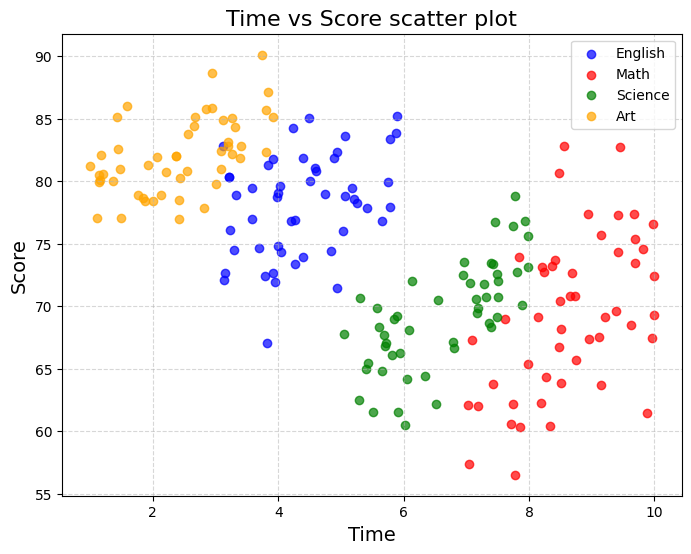

In [26]:
# Plotting the distribution of the points
plt.figure(figsize=(8, 6))
plt.scatter(X_english, Y_english, color='blue', alpha=0.7, label="English")
plt.scatter(X_math, Y_math, color='red', alpha=0.7, label="Math")
plt.scatter(X_science, Y_science, color='green', alpha=0.7, label="Science")
plt.scatter(X_art, Y_art, color='orange', alpha=0.7, label="Art")
plt.title('Time vs Score scatter plot', fontsize=16)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

Now I am creating an X matrix that I will use for my regression, while applying one-hot-encoding.

In [27]:
X = []
intercept = [1 for i in range(200)]
times = df['time'].tolist()
# art english science math
art = [0 for i in range(200)]
english = [0 for i in range(200)]
science = [0 for i in range(200)]
math = [0 for i in range(200)]
subjects = df['subject'].tolist()
for index in range(200):
    if(subjects[index] == 'art'):
        art[index] = 1
    elif(subjects[index] == 'english'):
        english[index] = 1
    elif(subjects[index] == 'science'):
        science[index] = 1
    elif(subjects[index] == 'math'):
        math[index] = 1
times_art = [i * j for i,j in zip(times, art)]
times_english = [i * j for i,j in zip(times, english)]
times_science = [i * j for i,j in zip(times, science)]
times_math = [i * j for i,j in zip(times, math)]

for i in range(200):
    row = []
    row.append(intercept[i])
    row.append(times[i])
    row.append(art[i])
    row.append(english[i])
    row.append(science[i])
    row.append(math[i])
    row.append(times_art[i])
    row.append(times_english[i])
    row.append(times_science[i])
    row.append(times_math[i])
    X.append(row)

# Define column names
columns = ['Intercept', 'Time', 'Art', 'English', 'Science', 'Math', 'Time-Art', 'Time-English', 'Time-Science', 'Time-Math']


# Create a DataFrame
df_new = pd.DataFrame(X, columns=columns)

# Making a copy for later
df_new2 = df_new

# Print the DataFrame
df_new

,Intercept,Time,Art,English,Science,Math,Time-Art,Time-English,Time-Science,Time-Math
0,1,3.259355,1,0,0,0,3.259355,0.0,0.0,0.000000
1,1,1.373325,1,0,0,0,1.373325,0.0,0.0,0.000000
2,1,2.419104,1,0,0,0,2.419104,0.0,0.0,0.000000
3,1,3.405667,1,0,0,0,3.405667,0.0,0.0,0.000000
4,1,3.806870,1,0,0,0,3.806870,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...
195,1,7.090754,0,0,0,1,0.000000,0.0,0.0,7.090754
196,1,8.237701,0,0,0,1,0.000000,0.0,0.0,8.237701
197,1,9.988836,0,0,0,1,0.000000,0.0,0.0,9.988836
198,1,7.745960,0,0,0,1,0.000000,0.0,0.0,7.745960


To avoid dummy-variable trap, I remove one category since I can get information about it from the rest. the category I remove is 'art'.

In [28]:
del df_new['Art']
del df_new['Time-Art']
df_new

,Intercept,Time,English,Science,Math,Time-English,Time-Science,Time-Math
0,1,3.259355,0,0,0,0.0,0.0,0.000000
1,1,1.373325,0,0,0,0.0,0.0,0.000000
2,1,2.419104,0,0,0,0.0,0.0,0.000000
3,1,3.405667,0,0,0,0.0,0.0,0.000000
4,1,3.806870,0,0,0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...
195,1,7.090754,0,0,1,0.0,0.0,7.090754
196,1,8.237701,0,0,1,0.0,0.0,8.237701
197,1,9.988836,0,0,1,0.0,0.0,9.988836
198,1,7.745960,0,0,1,0.0,0.0,7.745960


Now I will construct an OLS model to see the regression results from which I will get my betas.

In [29]:
import statsmodels.api as sm
# Add a constant term to the independent variables for the intercept
X = sm.add_constant(df_new)

# Reset the indices of both DataFrames
df_new.reset_index(drop=True, inplace=True)
df.reset_index(drop=True, inplace=True)

# Fit the OLS model
model = sm.OLS(df['score'], X).fit()

# Print regression summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     68.31
Date:                Wed, 13 Dec 2023   Prob (F-statistic):           9.43e-49
Time:                        20:54:13   Log-Likelihood:                -553.49
No. Observations:                 200   AIC:                             1123.
Df Residuals:                     192   BIC:                             1149.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       77.5733      1.665     46.585   

Now I am just computing my regression line from my X matrix, combined with the betas from the OLS regression.

In [30]:
# Here I define the lists where I store the y values for the regression lines
eng = []
science = []
math = []
art = []

# Now I just iterate over every X and compute the regression values for all subjects
for index, row in df_new.iterrows():
    eng_val = model.params['Intercept'] + model.params['English'] + row["Time"] * (model.params['Time'] + model.params['Time-English'])
    science_val = model.params['Intercept'] + model.params['Science'] + row["Time"] * (model.params['Time'] + model.params['Time-Science'])
    math_val = model.params['Intercept'] + model.params['Math'] + row["Time"] * (model.params['Time'] + model.params['Time-Math'])
    art_val = model.params['Intercept'] + row["Time"] * model.params['Time']
    eng.append(eng_val)
    science.append(science_val)
    math.append(math_val)
    art.append(art_val)

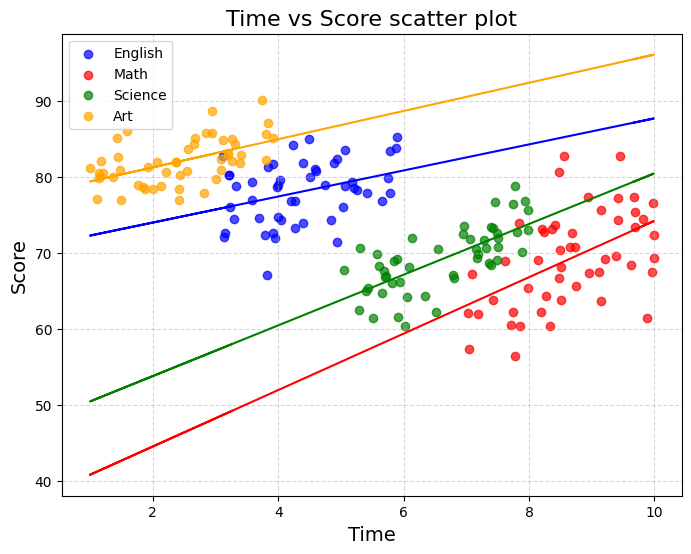

In [31]:
# Now we just need to plot the regression lines as we did in the lecture
plt.figure(figsize=(8, 6))
plt.scatter(X_english, Y_english, color='blue', alpha=0.7, label="English")
plt.scatter(X_math, Y_math, color='red', alpha=0.7, label="Math")
plt.scatter(X_science, Y_science, color='green', alpha=0.7, label="Science")
plt.scatter(X_art, Y_art, color='orange', alpha=0.7, label="Art")
plt.plot(df_new["Time"].tolist(), eng, color="blue")
plt.plot(df_new["Time"].tolist(), science, color='green')
plt.plot(df_new["Time"].tolist(), math, color='red')
plt.plot(df_new["Time"].tolist(), art, color='orange')
plt.title('Time vs Score scatter plot', fontsize=16)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

#### Subtask 2
*Consider the F-test for the null hypothesis that the four slopes are equal. Compute 
the F-statistic in at least four different ways, by considering at least two different costructions of the design matrix X and, in each case, tw  different matrices R to describ 
the null hypothesis. Are the e different testing procedures in contradiction with each othe*r?

I will first use the design metrix I already constructed, and the hypothesis I will be testing is: \
$H_0 : \beta_6 = \beta_7 = \beta_8$

In [39]:
import statsmodels.api as sm
from scipy.stats import f

R = np.array([[0, 0, 0, 0, 0, 1, 0, 0],
     [0, 0, 0, 0, 0, 0, 1, 0],
     [0, 0, 0, 0, 0, 0, 0, 1]])
betas = []
for i in model.params.tolist():
    betas.append([i])

r = np.array([0, 0, 0])
result = np.dot(R, betas)

# Obtain the residuals
residuals = model.resid

# Perform the F-test for the hypothesis H0: R * beta = r
f_statistic = (R @ model.params - r) @ np.linalg.inv(R @ np.linalg.inv(np.dot(X.T, X)) @ R.T) @ (R @ model.params - r) / R.shape[0]
p_value = 1 - f.cdf(f_statistic, R.shape[0], X.shape[0] - X.shape[1])

alpha = 0.05

print("F-statistic:", f_statistic)
print("P-value:", p_value)

# Check if p-value is less than the significance level
if p_value < alpha:
    print("We reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")

F-statistic: 36.89892808830671
P-value: 1.1102230246251565e-16
We reject the null hypothesis.


We can see that the resulting vector is non-zero vector which means that we reject this hypothesis. \
The next hypothesis I will be testing is: \
$H_0 : \beta_5 = \beta_8, \beta_6 = \beta_8, \beta_7 = \beta_8$ 
By constructing an R matrix such that we get a vector: \
$R\beta = 
\begin{bmatrix}
    \beta_5 - \beta_8 \\
    \beta_6 - \beta_8 \\
    \beta_7 - \beta_8 \\
\end{bmatrix}
$


In [40]:
R2 = np.array([[0, 0, 0, 0, 1, 0, 0, -1],
     [0, 0, 0, 0, 0, 1, 0, -1],
     [0, 0, 0, 0, 0, 0, 1, -1]])
result = np.dot(R2, betas)

f_statistic = (R2 @ model.params - r) @ np.linalg.inv(R2 @ np.linalg.inv(np.dot(X.T, X)) @ R2.T) @ (R2 @ model.params - r) / R2.shape[0]
p_value = 1 - f.cdf(f_statistic, R2.shape[0], X.shape[0] - X.shape[1])

alpha = 0.05

print("F-statistic:", f_statistic)
print("P-value:", p_value)

# Check if p-value is less than the significance level
if p_value < alpha:
    print("We reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")

F-statistic: 361.2232299939912
P-value: 1.1102230246251565e-16
We reject the null hypothesis.


Again we see that the resulting vector is a non-zero one, so we reject our hypothesis. \
Now I will construct the other design matrix that we discussed in the lecture and test two more hypothesis.

In [45]:
X = []
intercept = [1 for i in range(200)]
times = df['time'].tolist()
# art english science math
art = [0 for i in range(200)]
english = [0 for i in range(200)]
science = [0 for i in range(200)]
math = [0 for i in range(200)]
subjects = df['subject'].tolist()
for index in range(200):
    if(subjects[index] == 'art'):
        art[index] = 1
    elif(subjects[index] == 'english'):
        english[index] = 1
    elif(subjects[index] == 'science'):
        science[index] = 1
    elif(subjects[index] == 'math'):
        math[index] = 1
times_art = [i * j for i,j in zip(times, art)]
times_english = [i * j for i,j in zip(times, english)]
times_science = [i * j for i,j in zip(times, science)]
times_math = [i * j for i,j in zip(times, math)]

for i in range(200):
    row = []
    row.append(intercept[i])
    row.append(times[i])
    row.append(art[i])
    row.append(english[i])
    row.append(science[i])
    row.append(math[i])
    row.append(times_art[i])
    row.append(times_english[i])
    row.append(times_science[i])
    row.append(times_math[i])
    X.append(row)

# Define column names
columns = ['Intercept', 'Time', 'Art', 'English', 'Science', 'Math', 'Time-Art', 'Time-English', 'Time-Science', 'Time-Math']


# Create a DataFrame
df_new2 = pd.DataFrame(X, columns=columns)

In [46]:
df_new2

,Intercept,Time,Art,English,Science,Math,Time-Art,Time-English,Time-Science,Time-Math
0,1,3.259355,1,0,0,0,3.259355,0.0,0.0,0.000000
1,1,1.373325,1,0,0,0,1.373325,0.0,0.0,0.000000
2,1,2.419104,1,0,0,0,2.419104,0.0,0.0,0.000000
3,1,3.405667,1,0,0,0,3.405667,0.0,0.0,0.000000
4,1,3.806870,1,0,0,0,3.806870,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...
195,1,7.090754,0,0,0,1,0.000000,0.0,0.0,7.090754
196,1,8.237701,0,0,0,1,0.000000,0.0,0.0,8.237701
197,1,9.988836,0,0,0,1,0.000000,0.0,0.0,9.988836
198,1,7.745960,0,0,0,1,0.000000,0.0,0.0,7.745960


In the lecture we dropped the intercept and time columns.

In [47]:
del df_new2['Intercept']
del df_new2['Time']
df_new2

,Art,English,Science,Math,Time-Art,Time-English,Time-Science,Time-Math
0,1,0,0,0,3.259355,0.0,0.0,0.000000
1,1,0,0,0,1.373325,0.0,0.0,0.000000
2,1,0,0,0,2.419104,0.0,0.0,0.000000
3,1,0,0,0,3.405667,0.0,0.0,0.000000
4,1,0,0,0,3.806870,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...
195,0,0,0,1,0.000000,0.0,0.0,7.090754
196,0,0,0,1,0.000000,0.0,0.0,8.237701
197,0,0,0,1,0.000000,0.0,0.0,9.988836
198,0,0,0,1,0.000000,0.0,0.0,7.745960


I first have to calculate OLS regression stats to compute the betas for given task.

In [48]:
# Add a constant term to the independent variables for the intercept
X = sm.add_constant(df_new2)

# Reset the indices of both DataFrames
df_new.reset_index(drop=True, inplace=True)
df.reset_index(drop=True, inplace=True)

# Fit the OLS model
model = sm.OLS(df['score'], X).fit()

# Print regression summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     68.31
Date:                Wed, 13 Dec 2023   Prob (F-statistic):           9.43e-49
Time:                        21:09:56   Log-Likelihood:                -553.49
No. Observations:                 200   AIC:                             1123.
Df Residuals:                     192   BIC:                             1149.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           46.4817      1.582     29.384   

In [49]:
betas2 = []
for i in model.params.tolist():
    betas2.append([i])

For this design matrix, hypothesis I will be testing is: \
$H_0 : \beta_5 = \beta_6 = \beta_7 = \beta_8 = 0$

In [53]:
R3 = np.array([[0, 0, 0, 0, 0, 1, 0, 0, 0],
     [0, 0, 0, 0, 0, 0, 1, 0, 0],
     [0, 0, 0, 0, 0, 0, 0, 1, 0],
     [0, 0, 0, 0, 0, 0, 0, 0, 1]])
result = np.dot(R3, betas2)

r = np.array([0, 0, 0, 0])

f_statistic = (R3 @ model.params - r) @ np.linalg.inv(R3 @ np.linalg.inv(np.dot(X.T, X)) @ R3.T) @ (R3 @ model.params - r) / R3.shape[0]
p_value = 1 - f.cdf(f_statistic, R3.shape[0], X.shape[0] - X.shape[1])

alpha = 0.05

print("F-statistic:", f_statistic)
print("P-value:", p_value)

# Check if p-value is less than the significance level
if p_value < alpha:
    print("We reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")

F-statistic: 288.0657527712842
P-value: 1.1102230246251565e-16
We reject the null hypothesis.


The next hypothesis I will be testing is: \
$H_0 : \beta_5 = \beta_7, \beta_6 = \beta_7, \beta_8 = \beta_7$ 
By constructing an R matrix such that we get a vector: \
$R\beta = 
\begin{bmatrix}
    \beta_5 - \beta_7 \\
    \beta_6 - \beta_7 \\
    \beta_8 - \beta_7 \\
\end{bmatrix}
$


In [55]:
R4 = np.array([[0, 0, 0, 0, 0, 1, 0, -1, 0],
     [0, 0, 0, 0, 0, 0, 1, -1, 0],
     [0, 0, 0, 0, 0, 0, 0, -1, 1]])

r = np.array([0, 0, 0])
result = np.dot(R4, betas2)

f_statistic = (R4 @ model.params - r) @ np.linalg.inv(R4 @ np.linalg.inv(np.dot(X.T, X)) @ R4.T) @ (R4 @ model.params - r) / R4.shape[0]
p_value = 1 - f.cdf(f_statistic, R4.shape[0], X.shape[0] - X.shape[1])

alpha = 0.05

print("F-statistic:", f_statistic)
print("P-value:", p_value)

# Check if p-value is less than the significance level
if p_value < alpha:
    print("We reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")

F-statistic: 36.898928088303585
P-value: 1.1102230246251565e-16
We reject the null hypothesis.


We again see that the vector is non zero in both examples for which we reject the hypothesis.